Entrega: La entrega de este examen se realizará a traves del git hub, en directorio https://github.com/hernansalinas/Metodos_Computacionales_taller/tree/main/Quiz/Entregas

El nombre del notebook deberá ser:

Apellido_Nombre_UltimosCuatroDigitosDelDocumento.ipynb

# Paracaidista en un atmosfera no uniforme.

En una atmósfera isotérmica, la variación de la presión en función de la altitud está dada por la ley de Laplace.

\begin{equation}
P=P_0 e^{-\frac{Mgy}{kT}}
\end{equation}


- $P_0=1atm$ es la presión de la atmósfera a nivel del mar
- M es el peso molecular del aire $28.8 g/mol=0.0288 kg/mol$
- g es la aceleración de la gravedad
- $k=1.3805·10^{-23}$ J/K es la constante de Boltzmann
- $T$ es la temperatura de la atmósfera en kelvin
- $NA=6.0225\times 10^23$ es el número de Avogadro, número de moléculas que caben en un mol.

Suponiendo que el aire se comporta como un gas ideal, su densidad varía con la altura de la misma forma que la presión, $\rho=\rho_0 exp(-y/\lambda)$. La densidad del aire al nivel del mar es $\rho_0=1.29 kg/m^3$ y la constante $\lambda=7482.2 m$


Las fuerzas que actuan sobre el paracaidista son:  El peso y la fuerza de fricción $f=\frac{1}{2}\rho A \delta v^2$, donde $\rho$ es la densidad que depende de la altura, A es el area de seccion trasnversal expuesta al aire  y $\delta $ es coeficiente de rozamiento. La Ecuacion diferencial de movimiento viene dada por:

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - g + \frac{A\delta}{2m} \rho v^2 
\end{equation}


\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - mg + k_0v^2 exp(-y/\lambda)
\end{equation}

donde $k_0=\frac{\rho_0A\delta}{2m}$, siendo $\rho_0$ la densidad al nivel del mar.

Para la situación descrita, su tarea será elaborar un notebook de jupyter para resolver lo siguente:

1.  Elaborar una gráfica de la densidad como función de la altura.
2. Diseñar un programa que resuelva  la ecuación diferencial que describe el movimiento del paracaidista, para los siguientes parámetros: 

- $m=60kg$, $A=0.3m^2$, $h=30km$.
- $m=60kg$, $A=0.3m^2$, $h=40km$.
- $m=60kg$, $A=0.3m^2$, $h=50km$.
- $m=60kg$, $A=0.3m^2$, $h=60km$.
- $m=60kg$, $A=0.3m^2$, $h=70km$.

3. Con la solucion de la ecuacion diferencial, elaborar una gráfica de. 
- la posición como función del tiempo.
- La velocidad como función del tiempo.
- La velocidad como función de la posición 

4. Determine numéricamente y analiticamente el valor de la velocidad maxima para las diferentes altura Compara su resultado con:

http://www.sc.ehu.es/sbweb/fisica3/fluidos/paracaidas/paracaidas_1.html



5. Realice un grafico de la velocidad maxima como función de la altura de caida.



Reto:

El modelo puede ser mejorado si se tiene presente que la aceleración de la gravedad varia según la altura.

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - \frac{GM}{(R+y)^2} + \frac{A\delta}{2m} \rho v^2 
\end{equation}

donde $G=6.67\times 10^{-11} \mathrm{Nm^2/kg}$, $M=5.98\times 10 ^{24} \mathrm{kg}$ y el radio de la Tierra es de $R=6.371\mathrm{km}$


Solucione la ecuación diferencial para este caso.





In [236]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd

#Solución 1

1.Elaborar una gráfica de la densidad como función de la altura.

$\rho=\rho_0 exp(-y/\lambda)$

La densidad del aire al nivel del mar es $\rho_0=1.29 kg/m^3$ y la constante $\lambda=7482.2 m$



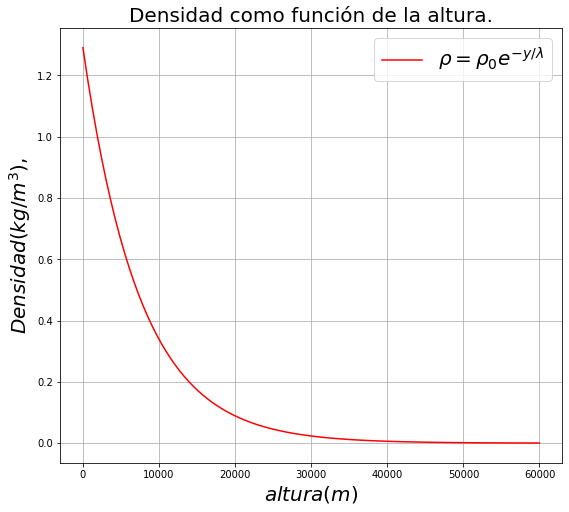

In [237]:
# Función densidad.

p_0 = 1.29 # Densidad del aire al nivel del mar.
k = 7482.2 # Constante lambda.
f = lambda y: p_0*np.exp((-y)/k)

# Valores a evaluar para la grafica.
values = np.linspace(0,6*10**4,100)

# Grafica.
plt.figure(figsize=(9, 8))
plt.plot(values,f(values), 'r', label = r'$\rho=\rho_0e^{-y/\lambda}$')
plt.xlabel('$altura(m)$',size=20)
plt.ylabel('$Densidad(kg/m^3),$',size=20)
plt.title('Densidad como función de la altura.',size=20)
plt.grid()
plt.legend(prop={'size': 20})
plt.show()




#Solución 2-3

2.Diseñar un programa que resuelva  la ecuación diferencial que describe el movimiento del paracaidista, para los siguientes parámetros: 

- $m=60kg$, $A=0.3m^2$, $h=30km$.
- $m=60kg$, $A=0.3m^2$, $h=40km$.
- $m=60kg$, $A=0.3m^2$, $h=50km$.
- $m=60kg$, $A=0.3m^2$, $h=60km$.
- $m=60kg$, $A=0.3m^2$, $h=70km$.

3.Con la solucion de la ecuacion diferencial, elaborar una gráfica de. 
- la posición como función del tiempo.
- La velocidad como función del tiempo.
- La velocidad como función de la posición 


\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - g + \frac{A\delta}{2m} \rho v^2 
\end{equation}


\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - mg + k_0v^2 exp(-y/\lambda)
\end{equation}

Conversitir en sistema de ecuaciones acopladas.

\begin{equation}
\frac{\mathrm{d}y}{\mathrm{d}t} = v
\end{equation}


\begin{equation}
\frac{\mathrm{d}v}{\mathrm{d}t} = - mg + k_0v^2 exp(-y/\lambda)
\end{equation}



In [261]:

# Resolver ecuaciones __________________________
def func(y, t, parameters):
  m = parameters[0]
  A = parameters[1]
  lambda_= 7482.2   
  g = 9.8
  k= (1.29*A*0.8)/(2) 
  dydt = y[1]
  dvdt = -g + (((k*y[1]**2)/m)*np.exp(-y[0]/lambda_))
  return [dydt, dvdt]
#________________________________________________



## caso 1
$m=60kg$, $A=0.3m^2$, $h=30km$.


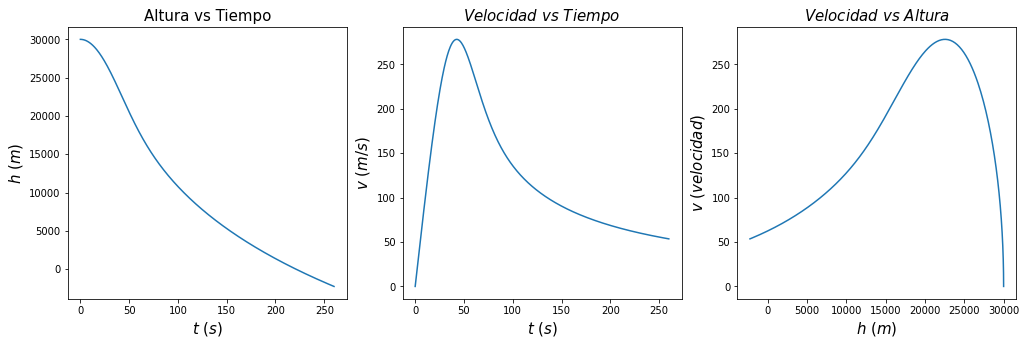

In [239]:
x0 = np.array([30000,0]) # Condicones iniciales.
t = np.linspace(0,260,500) # Tiempo de integración.
parameters = [60,0.3] # Parametros m y A.

solution = odeint(func,x0,t,args=(parameters,)) # Solución.
x_0 = solution[:,0] # Posición
x_1 = solution[:,1] # Velocidad.


# Graficas.
plt.figure(figsize=(17, 5))
plt.subplot(131)
plt.plot(t,x_0)
plt.xlabel(r"$t~(s)$",size=15)
plt.ylabel(r"$h~(m)$",size=15)
plt.title("Altura vs Tiempo",size=15)
plt.subplot(132)
plt.plot(t,-x_1)
plt.xlabel(r"$t~(s)$",size=15)
plt.ylabel(r"$v~(m/s)$",size=15)
plt.title(r"$Velocidad~vs~Tiempo$",size=15)
plt.subplot(133)
plt.plot(x_0,-x_1)
plt.xlabel(r"$h~(m)$",size=15)
plt.ylabel(r"$v~(velocidad)$",size=15)
plt.title(r"$Velocidad~vs~Altura$",size=15)
plt.show()


## caso 2
$m=60kg$, $A=0.3m^2$, $h=40km$.



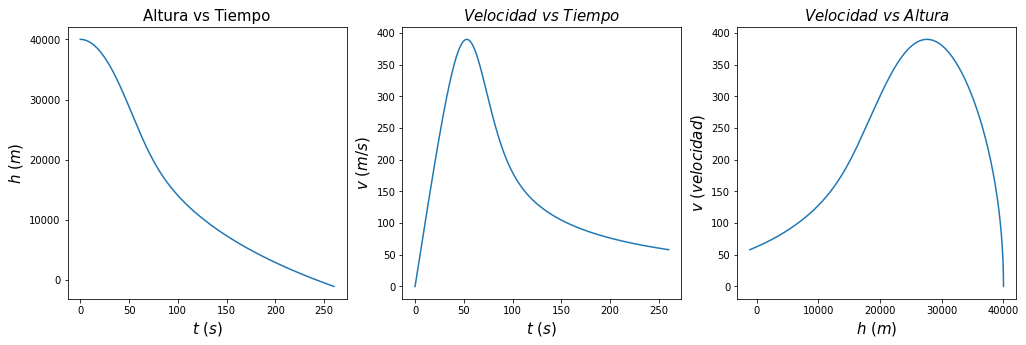

In [240]:
x0 = np.array([40000,0]) # Condicones iniciales.
t = np.linspace(0,260,500) # Tiempo de integración.
parameters = [60,0.3] # Parametros m y A.

solution = odeint(func,x0,t,args=(parameters,)) # Solución.
x_0 = solution[:,0] # Posición
x_1 = solution[:,1] # Velocidad.


# Graficas.
plt.figure(figsize=(17, 5))
plt.subplot(131)
plt.plot(t,x_0)
plt.xlabel(r"$t~(s)$",size=15)
plt.ylabel(r"$h~(m)$",size=15)
plt.title("Altura vs Tiempo",size=15)
plt.subplot(132)
plt.plot(t,-x_1)
plt.xlabel(r"$t~(s)$",size=15)
plt.ylabel(r"$v~(m/s)$",size=15)
plt.title(r"$Velocidad~vs~Tiempo$",size=15)
plt.subplot(133)
plt.plot(x_0,-x_1)
plt.xlabel(r"$h~(m)$",size=15)
plt.ylabel(r"$v~(velocidad)$",size=15)
plt.title(r"$Velocidad~vs~Altura$",size=15)
plt.show()


## caso 3
$m=60kg$, $A=0.3m^2$, $h=50km$.


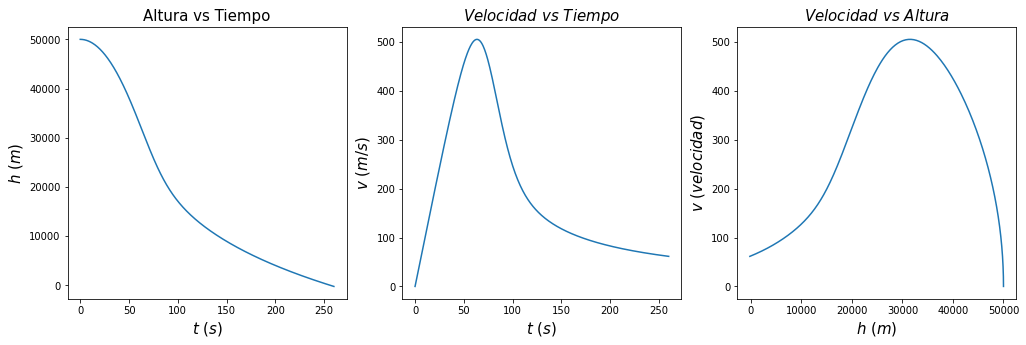

In [241]:
x0 = np.array([50000,0]) # Condicones iniciales.
t = np.linspace(0,260,500) # Tiempo de integración.
parameters = [60,0.3] # Parametros m y A.

solution = odeint(func,x0,t,args=(parameters,)) # Solución.
x_0 = solution[:,0] # Posición
x_1 = solution[:,1] # Velocidad.


# Graficas.
plt.figure(figsize=(17, 5))
plt.subplot(131)
plt.plot(t,x_0)
plt.xlabel(r"$t~(s)$",size=15)
plt.ylabel(r"$h~(m)$",size=15)
plt.title("Altura vs Tiempo",size=15)
plt.subplot(132)
plt.plot(t,-x_1)
plt.xlabel(r"$t~(s)$",size=15)
plt.ylabel(r"$v~(m/s)$",size=15)
plt.title(r"$Velocidad~vs~Tiempo$",size=15)
plt.subplot(133)
plt.plot(x_0,-x_1)
plt.xlabel(r"$h~(m)$",size=15)
plt.ylabel(r"$v~(velocidad)$",size=15)
plt.title(r"$Velocidad~vs~Altura$",size=15)
plt.show()

## caso 4
$m=60kg$, $A=0.3m^2$, $h=60km$.


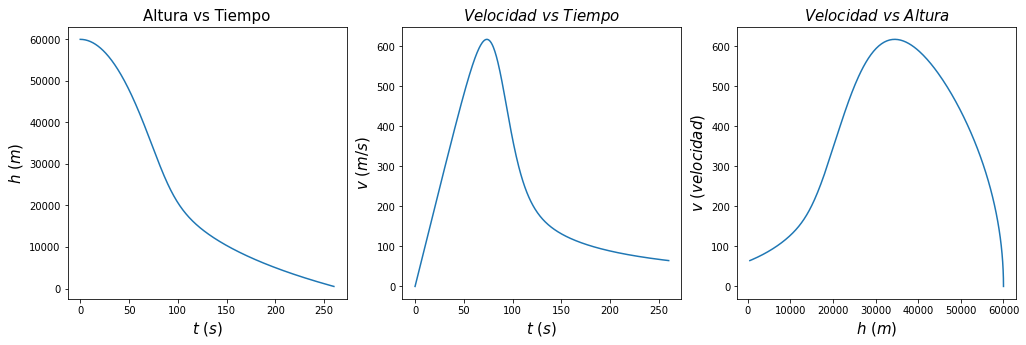

In [242]:
x0 = np.array([60000,0]) # Condicones iniciales.
t = np.linspace(0,260,500) # Tiempo de integración.
parameters = [60,0.3] # Parametros m y A.

solution = odeint(func,x0,t,args=(parameters,)) # Solución.
x_0 = solution[:,0] # Posición
x_1 = solution[:,1] # Velocidad.


# Graficas.
plt.figure(figsize=(17, 5))
plt.subplot(131)
plt.plot(t,x_0)
plt.xlabel(r"$t~(s)$",size=15)
plt.ylabel(r"$h~(m)$",size=15)
plt.title("Altura vs Tiempo",size=15)
plt.subplot(132)
plt.plot(t,-x_1)
plt.xlabel(r"$t~(s)$",size=15)
plt.ylabel(r"$v~(m/s)$",size=15)
plt.title(r"$Velocidad~vs~Tiempo$",size=15)
plt.subplot(133)
plt.plot(x_0,-x_1)
plt.xlabel(r"$h~(m)$",size=15)
plt.ylabel(r"$v~(velocidad)$",size=15)
plt.title(r"$Velocidad~vs~Altura$",size=15)
plt.show()

## caso 5
$m=60kg$, $A=0.3m^2$, $h=70km$.


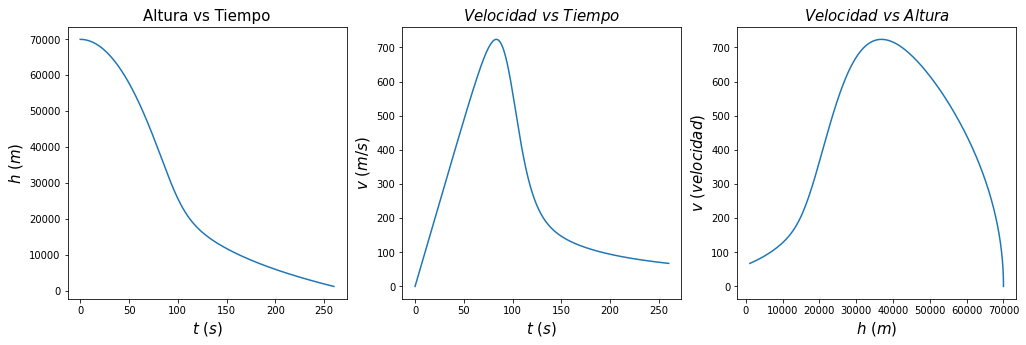

In [243]:
x0 = np.array([70000,0]) # Condicones iniciales.
t = np.linspace(0,260,500) # Tiempo de integración.
parameters = [60,0.3] # Parametros m y A.

solution = odeint(func,x0,t,args=(parameters,)) # Solución.
x_0 = solution[:,0] # Posición
x_1 = solution[:,1] # Velocidad.


# Graficas.
plt.figure(figsize=(17, 5))
plt.subplot(131)
plt.plot(t,x_0)
plt.xlabel(r"$t~(s)$",size=15)
plt.ylabel(r"$h~(m)$",size=15)
plt.title("Altura vs Tiempo",size=15)
plt.subplot(132)
plt.plot(t,-x_1)
plt.xlabel(r"$t~(s)$",size=15)
plt.ylabel(r"$v~(m/s)$",size=15)
plt.title(r"$Velocidad~vs~Tiempo$",size=15)
plt.subplot(133)
plt.plot(x_0,-x_1)
plt.xlabel(r"$h~(m)$",size=15)
plt.ylabel(r"$v~(velocidad)$",size=15)
plt.title(r"$Velocidad~vs~Altura$",size=15)
plt.show()

## Solución 4
4.Determine numéricamente y analiticamente el valor de la velocidad maxima para las diferentes altura Compara su resultado con:
http://www.sc.ehu.es/sbweb/fisica3/fluidos/paracaidas/paracaidas_1.html





Utilizando los valores maximos dados al usar odeint

In [244]:
t = np.linspace(0,260,500) # Tiempo de integración.
parameters = [60,0.3] # Parametros m y A.

h = [30000,40000,50000,60000,70000]

height_maxx = []

for i in h:
  x0 = np.array([i,0])
  solution = odeint(func,x0,t,args=(parameters,)) 
  x_1 = max(-solution[:,1]) 
  height_max.append(x_1)

df = pd.DataFrame(list(zip(h,height_max)),columns=["Height(m)","Speed(m/s)"])
df

,Height(m),Speed(m/s)
0,30000,277.476047
1,40000,389.052280
2,50000,503.922969
3,60000,621.102961
4,70000,721.033071


Utilizando el echo de que en un punto critico se cumple que:

\begin{equation}
\frac{\mathrm{d}v}{\mathrm{d}t} = 0
\end{equation}


\begin{equation}
0 = g + \frac{k_0}{m}v^2 exp(-y/\lambda)
\end{equation}

Entonces:
\begin{equation}
 \frac{mg}{k_0 exp(-y/\lambda)}=v^2 
\end{equation}



In [245]:

def vmax(h):
  g=9.8
  m=60
  k= (1.29* 0.3*0.8)/ 2
  lambda_= 7482.2 
  return ((g*m/k)*(1/np.exp(-h/lambda_)))**0.5

h = [30000,40000,50000,60000,70000]
height_max= []


for i in h:
   x0 = np.array([i,0])
   solution = odeint(func,x0,t,args=(parameters,)) 
   o = np.argmax(-solution[:,1])
   xd = solution[:,0] 
   height_max.append(vmax(xd[o]))
  
    

df = pd.DataFrame(list(zip(h,height_max)),columns=["Height(m)","Speed(m/s)"])
df


,Height(m),Speed(m/s)
0,30000,277.476047
1,40000,389.052280
2,50000,503.922969
3,60000,621.102961
4,70000,721.033071


## Solución 5
5.Realice un grafico de la velocidad maxima como función de la altura de caida.


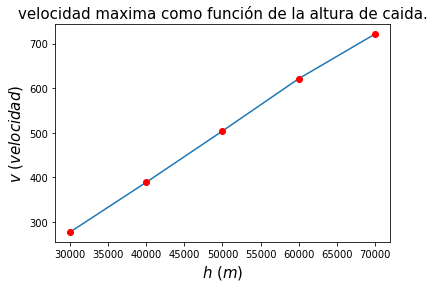

In [247]:
plt.plot(h,height_max)
plt.plot(h,height_max,'ro')
plt.xlabel(r"$h~(m)$",size=15)
plt.ylabel(r"$v~(velocidad)$",size=15)
plt.title(r"velocidad maxima como función de la altura de caida.",size=15)
plt.show()